Dave Lempke

PHY480

Final Project

Lotka Volterra predator-prey model

# Introduction

My goal for this project was to implement the Lotka Volterra model presented in A Survey of Computational Physics by Landau in c++ and expand it to be able to handle more complex systems. In the book, the differential equations governing the change of prey population and predator population are seperate and only two species are ever simulated at the same time. I took the most devloped equations (LVM-III or eq12.59/12.60) and combined them in the rhs function in Final.cpp. The main motivation for these changes was to make code that is general and adaptable enough to be able to approach the dizzying complexity of real life natural systems. 

The differential equation function I created is made so that dP/dt can be found with any number of species interactions. This way, a species can be predator and prey to multiple different species. Additionaly, I created a new classification called Primary Consumer, which represents organisms that rely on the same carrying capacity K. This is meant to represent species that consume plants (like the pure prey species in the Lotka Volterra Model).

This distinction of Primary Consumer is made to allow for omnivourous species to be represented as well as general flexibility of the model.

When calculating the term in the differential equation relating to the environmental carrying capacity, the sum of ALL primary consumers population is put in place of the population of just the species in question. Currently I have it so there is only 1 common carrying capacity for primary consumers but this could be easily changed to account for multiple food sources.



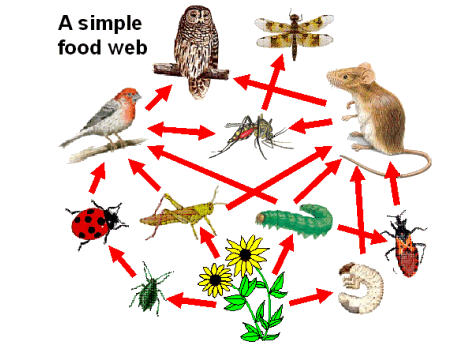

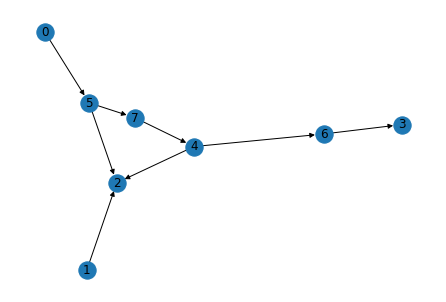

Above: randomly generated food web produced by my code.

# Data Structure and methods

All of the relevant parameters for the interaction between two species is held in a struct call parameters. These parameters structures are arranged in a 2D vector where the first index is the species in question and the second index is the one it is interacting with. This makes it easier to add more species (although it is a pain to enter the parameters)

I also created functions that create any N number of species and randomly assign interactions and parameters between them.
In this notebook too, there are functions for plotting, and for making a simple food web visualization using networkx.

The differential equations are solved using 4th order Runge Kutta method taken from diffeq_routines.cpp

The rhs function is a combination of both predator and prey equations and uses simple logic to determine how each interaction between two species should impact growth. 

# Results

Due to the complexitiy of N species interacting with N species in random ways, there are many different behaviors and scenarios that are possible with my program. I started with what seemed to be the next step from the book, and tried situations like 2 predators, 1 prey, and 2 prey 1 predator. However, virtually none of these tests went very long without one species going extinct. So I tested tweaking some values in a setup of three species consuming eachother in a line. 

1 = Eats species 2

2 = Prey species

3 = Eats species 1

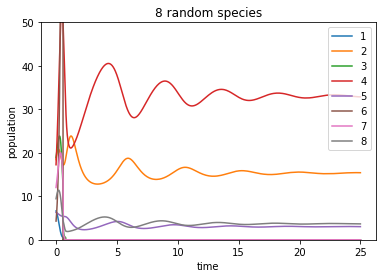

Here are the basic parameters used for the runs below

    parameters p11 = {"Neutral" ,false ,true, 2.0 , 1.0 , 100 , 2, .03, 1};
    parameters p12 = {"Predator",false ,true, 2.0 , 1.0 , 100 , 2, .03, 1};
    parameters p13 = {"Prey"    ,false ,true, 2.0 , 1.0 , 100 , 2, .003, 1};
    
    parameters p21 = {"Prey",true,true,6.0,1.0,750,2,.1,.1};
    parameters p22 = {"Neutral",true,true,6.0,1.0,750,2,.1,.1};
    parameters p23 = {"Neutral",true,true,6.0,1.0,750,2,.1,.1};

    parameters p31 = {"Predator",false,true,1.0,1.0,100,2,.1,.1};
    parameters p32 = {"Neutral",false,true,1.0,1.0,100,2,.1,.1};
    parameters p33 = {"Neutral",false,true,1.0,1.0,100,2,.1,.1};

All parameters are defined using the custom structure 

       typedef struct      // define a type to hold parameters 
    {
      string relation;    // eats feeds or neutral
      bool primary_comsumer_i;
      bool valid_i;
      double a_i;         // growth rate of organism i 
      double a_j;         // growth rate or organism j

      double K;           // primary comsumption carrying capacity

      double k;           // predation carrying capacity

      double b;           // predation rate (for prey)
      double t_h;         // predation handling time (for prey)

      //double phi_ext;    // phase angle for external force 
    }
    parameters;  

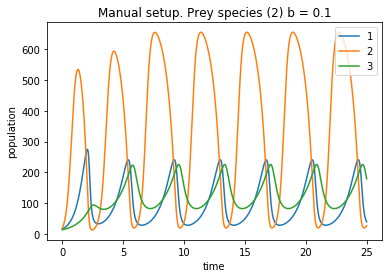

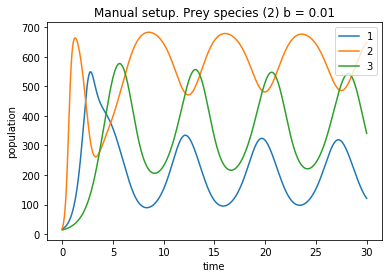

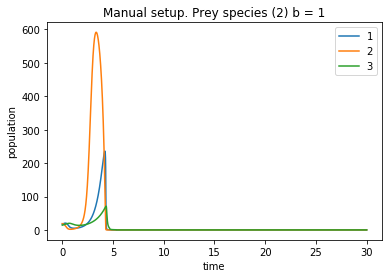

The b value varied in these plots represents how quickly the prey species(2) is eaten by the middle species (1). 
As can be seen, a variety of behaviors can arise from this one small change.
This value seems to have a direct relationship with all oscillation frequency. In the 3rd plot however, the response is so intense, all species almost immediately go extinct, then explode, then do go extinct. 

Oscillations with more damping can also be observed here.

All of these behaviors with three species are the same that are decribed in the book. This gave me some confidence in the model working so I could move on to N species.

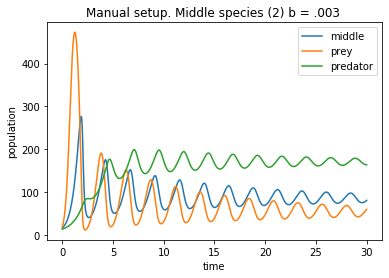

Another interesting change is above where an order of magnitude reduction in the rate at which the middle species is eat results in a higher frequency for each coupled oscillation as well as much greater damping.

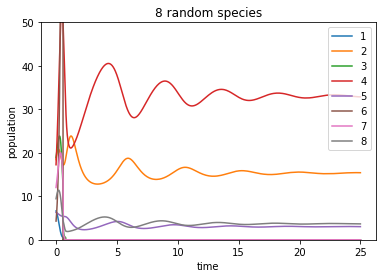

Above is an example of 8 species generated randomly where 3 went extinct very quickly and 1 survived at very low numbers. This wasn't from the final version of my code so there is no graphing data, but this shows that oscillitory behavior can be found with more species (although it becomes rarer with more species)

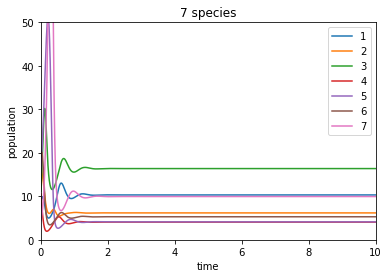

Above is a much more typical successful run of a random setup. There is chaos at the start (as is to be expected), then an equilibrium is quickly reached. As the number of species increases, the resulting equilibrium becomes more and more stable.

The only atypical thing about this plot is that all of the species survived. Sometimes there is a species whose equilibrium exists below the arbitary extinction theshold and its death leds to the death of others who longer have a food source and are removed. 

Below is the very satisfying food web created from this run. The arrows here point in the direction of digestion. ex: 4 eats 6. NOTE:(0 represents the primary food source, and there should be an arrow going from 4 to 1.)

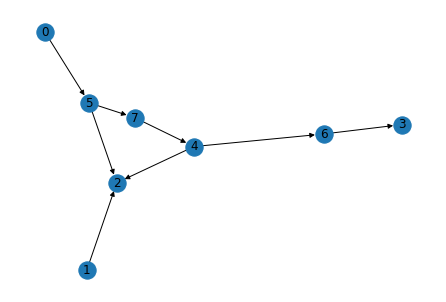

Using larger numbers for N can create very complex systems

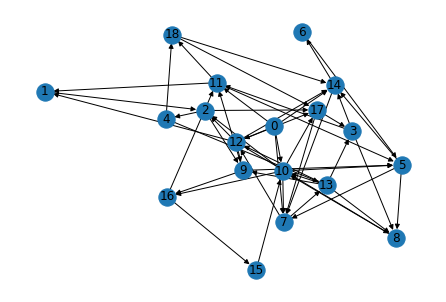

So complex, it is hard to draw any useful conclusions. Here, 8 is an apex predator.

# Plotting Code

In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [39]:
def plot_from_file(filename,title):

    data = np.genfromtxt(filename,
                         skip_header=0,
                         skip_footer=1,
                         names=True,
                         dtype=None,
                         delimiter='  ')

    plot_data = np.zeros(shape=(len(data),len(data[0])))
    iind = -1

    for i in data:
        jind = -1
        iind+=1
        #print(i)
        for j in i:
            #print("aaa")
            jind+=1
            plot_data[iind][jind] = j


    plt.plot(plot_data[:,0],plot_data[:,1:])
    plt.legend(('1','2','3','4','5','6','7','8','9','10'),loc=1)
    plt.xlabel("time")
    plt.ylabel("population")
    plt.ylim(0,50)
    plt.xlim(0,10)
    plt.title(title)

In [68]:
def graph_foodchain(file):
    
    data = np.genfromtxt(file,
                     skip_header=0,
                     skip_footer=0,
                     names=True,
                     dtype=None,
                     delimiter=' ')
    
    G = nx.DiGraph()
    for i in data:
        G.add_edge(i[0], i[1])

    nx.draw(G, pos=nx.spring_layout(G),with_labels = True )
    #nx.draw(G, pos=nx.circular_layout(G),with_labels = True )
    #nx.draw(G, pos=nx.spectral_layout(G),with_labels = True )
    
    ## DIFFERENT DRAWING OPTIONS If the graph looks terrible try a different one

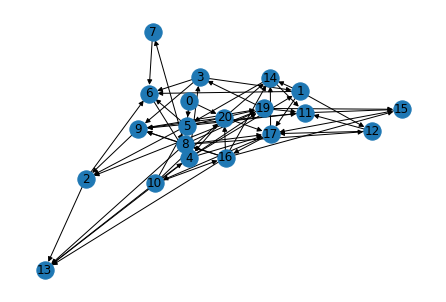

In [71]:
graph_foodchain('Finalgraph.dat')

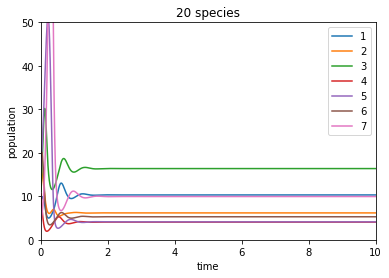

In [72]:
plot_from_file('Final4.dat','20 species')

# Some analysis

There are many weird and interesting bugs that can occur in this simulation (and many, many more that I had to work through). One that is still present is the possibility of feedback loops occuring. Perhaps the greatest flaw with this method is that the populations do not actually have a unit. 1 population does not correspond to an amount of energy, or a mass, it only means something in relation to another population. Then with these complex networks, circular food flows can exist, and this circle could become a positive feedback loop if the parameters are right. 

Futhermore my code only represents these organisms interacting in a vaccum. This means nothing happens after equilibrium is reached (which is very fast in high N systems).

However, this code is very generalized and runs relatively quickly, so there is great possibility to add "events" to represent pertubations in the environment. This could represent human envolmenent, climate change, seasonal change, habitat destruction, evolution, and even the introduction of new species invasive or not. 

I planned on implementing something along these lines but all of my time was quickly consumed from my desire to generalize for N species. 

Unfortunately, it is likely I reinvented the wheel here in a much more confusing way. I'm almost certain that there exists some simple way to do this N sized linear dynamic system with linear algebra. I wanted to do this project in c++ to get better at it and linear algebra in c++ sounds like it would make me suffer greatly. My code also runs surprisingly fast even with very large N.

# Futher Analysis

Algorithm error: There is not exactly an easy way to compare the performance of the RK4 algorithm here with an exact solution. I did, however, run into problems a few times with too small of a step size. Before I implemented extinction and reduced h, If a predator population grew very quickly, its prey might drop to a negative population. Negative population threw no errors, but it quickly caused all connected species to reach INF or -nan. 



As for overall accuracy and usefulness of this project, I am not sure. It would certainly be much better if I deviated from Lotka Volterra and tried to represent dNutrients/dt instead. Something like this could be very useful however for drawing qualitative conclusions about the effects of perturbing a complex system. For example, on many of my test runs, the extinction of one species caused a cascade of other extinctions. This might represent something in reality about human involvment.

All of this potential usefulness or accuracy, however, pales in comparison to the cool graphs it generates

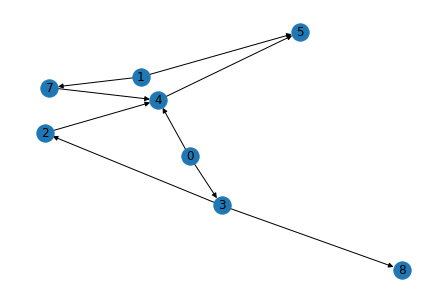